# ***Amazon Delivery Time Prediction***



##### **Project Type**    - Supervised Machine Learning Regression Project.
##### **Contribution**    - Individual

# **Project Summary**

This project leverages machine learning to predict Amazon delivery times using detailed e-commerce, agent, product, environmental, and route data. Through systematic steps—data preparation, cleaning, feature engineering, exploratory data analysis, multiple regression model training, and experiment tracking—the solution can forecast delivery completion times based on order parameters and real-time conditions.

With the ability to ingest new order details and generate accurate predictions, the model will support logistics teams by enabling smarter scheduling, reducing operational costs, and improving customer satisfaction. The included Streamlit front-end enables users to input variables and instantly receive estimated delivery times. Ultimately, the project’s outcome helps Amazon optimize delivery performance, streamline supply chain operations, and deliver a superior customer experience.




# **GitHub Link -**

https://github.com/asadamaanstat/Amazon-Delivery-Time-Prediction

# **Problem Statement**


This project leverages machine learning to predict Amazon delivery times using detailed e-commerce, agent, product, environmental, and route data. Through systematic steps—data preparation, cleaning, feature engineering, exploratory data analysis, multiple regression model training, and experiment tracking—the solution can forecast delivery completion times based on order parameters and real-time conditions.

With the ability to ingest new order details and generate accurate predictions, the model will support logistics teams by enabling smarter scheduling, reducing operational costs, and improving customer satisfaction. The included Streamlit front-end enables users to input variables and instantly receive estimated delivery times. Ultimately, the project’s outcome helps Amazon optimize delivery performance, streamline supply chain operations, and deliver a superior customer experience.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from geopy.distance import geodesic
from sklearn.model_selection import GridSearchCV

#!pip install mlflow

import mlflow
import mlflow.sklearn

### Dataset Loading

In [35]:
df = pd.read_csv('amazon_delivery.csv')

### Dataset First View

In [5]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Dataset Rows & Columns count

In [6]:
df.shape

(43739, 16)

### Dataset Information

In [7]:
df.dtypes

,0
Order_ID,object
Agent_Age,int64
Agent_Rating,float64
Store_Latitude,float64
Store_Longitude,float64
Drop_Latitude,float64
Drop_Longitude,float64
Order_Date,object
Order_Time,object
Pickup_Time,object


#### Duplicate Values

In [8]:
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [9]:
print(df.isnull().sum())

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


The dataset doesnot contain any dupliacte entry but there is some missing values for Agent Rating and Weather Condition.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [11]:
# Dataset Statistical Description
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


### Variables Description

The dataset contains detailed information about orders, agents, and delivery conditions:

● **Order_ID**: Unique identifier for each order.

● **Agent_Age**: Age of the delivery agent.

● **Agent_Rating**: Rating of the delivery agent.

● **Store_Latitude/Longitude**: Geographic location of the store.

● **Drop_Latitude/Longitude**: Geographic location of the delivery address.

● **Order_Date/Order_Time**: Date and time when the order was placed.

● **Pickup_Time**: Time when the delivery agent picked up the order.

● **Weather**: Weather conditions during delivery.

● **Traffic**: Traffic conditions during delivery.

● **Vehicle**: Mode of transportation used for delivery.

● **Area**: Type of delivery area (Urban/Metropolitan).

● **Delivery_Time**: Target variable representing the actual time taken for delivery (in hours).

● **Category**: Category of the product being delivered.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [36]:
df.drop('Order_ID', axis=1, inplace=True)
df.drop('Category', axis=1, inplace=True)

Both 'OrderID' and 'Product Category' were removed to eliminate irrelevant or non-informative columns. 'OrderID' is just a unique identifier and does not help in prediction, while 'Product Category' was not relevant to modeling delivery time. This streamlines the dataset, focusing only on useful features and improving model performance

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Delivery Time by Vehicle Type

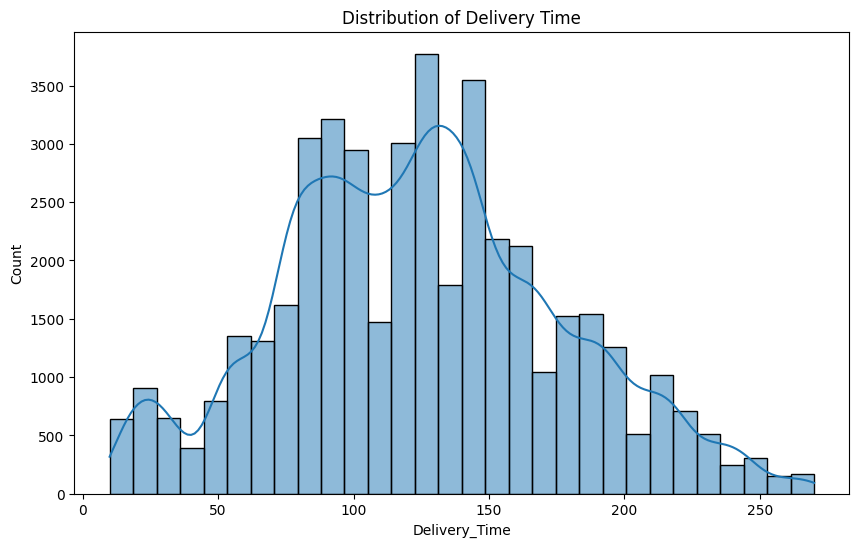

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.show()

The histogram was chosen because it clearly shows the distribution and frequency of delivery times, making it easy to spot typical values and outliers.

Most deliveries fall between 100 and 150 minutes, but the presence of long delays is notable and indicates some inefficiencies.

These insights can lead to business improvements by focusing actions on reducing late deliveries. However, if long delivery times persist, they can harm customer satisfaction and potentially lead to negative business growth.

#### Delivery Time by Weather

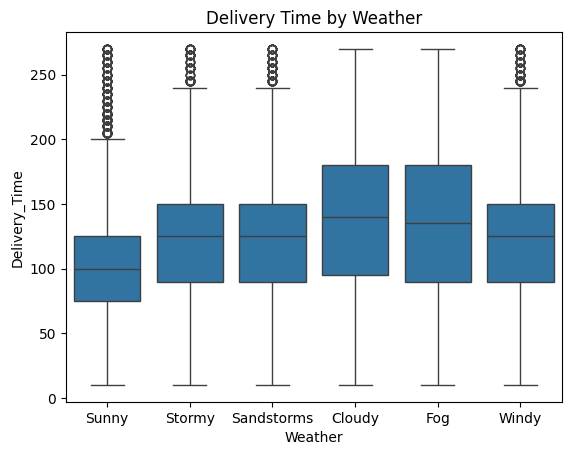

In [14]:
sns.boxplot(x="Weather", y="Delivery_Time", data=df)
plt.title("Delivery Time by Weather")
plt.show()

The boxplot was chosen because it easily compares delivery times across different weather conditions, highlighting medians and outliers for each category.

Deliveries take less time in sunny weather and are slower during cloudy and foggy conditions, suggesting weather impacts efficiency.

These insights help by showing where delays are likely, supporting better resource planning. Negative impact occurs mainly during fog and cloudy weather, leading to slower deliveries and worse customer experience if not addressed.

#### Delivery Time by Traffic Level

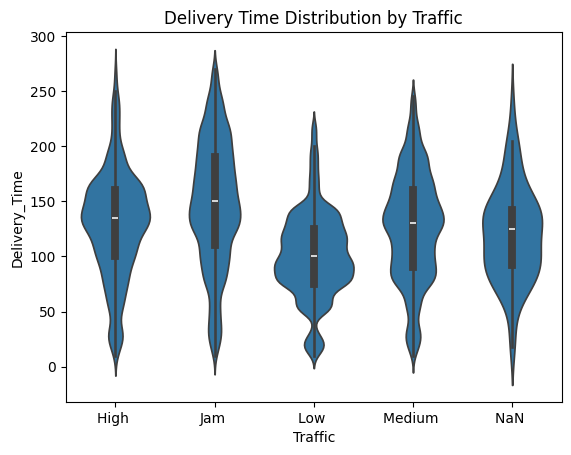

In [15]:
# Chart - 6 visualization code
sns.violinplot(x="Traffic", y="Delivery_Time", data=df)
plt.title("Delivery Time Distribution by Traffic")
plt.show()


The violin plot was chosen because it reveals the full distribution and variability of delivery times across different traffic conditions, not just the averages.

Deliveries in low traffic are generally faster and less variable, while those in high traffic or jams have longer and more spread-out delivery times.

These insights support business improvements by highlighting the need to plan around peak traffic periods. Persistently long deliveries in high-traffic conditions can negatively impact customer satisfaction and growth if mitigation strategies are not implemented.

#### Delivery Time vs Agent Rating

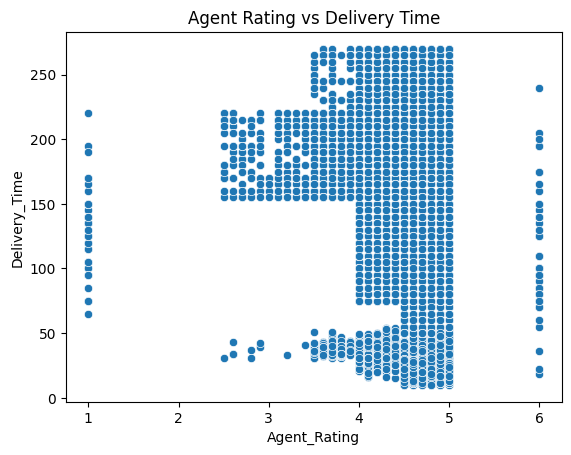

In [16]:
sns.scatterplot(x="Agent_Rating", y="Delivery_Time", data=df)
plt.title("Agent Rating vs Delivery Time")
plt.show()

The scatter plot was selected to show how delivery times vary across different agent ratings and identify any correlation.

There is no clear relationship between higher agent ratings and faster deliveries; delivery times appear spread across ratings.

These insights suggest that improving agent rating alone may not significantly reduce delivery times, prompting focus on other operational factors for business impact. No strong evidence of negative growth from agent rating alone is revealed by this chart.

#### Delivery Time by Vehicle/Area

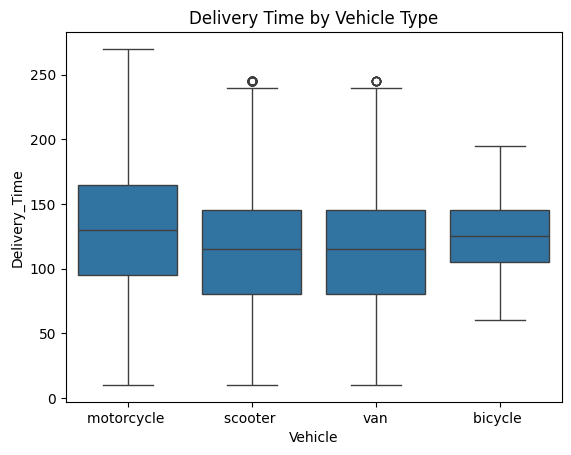

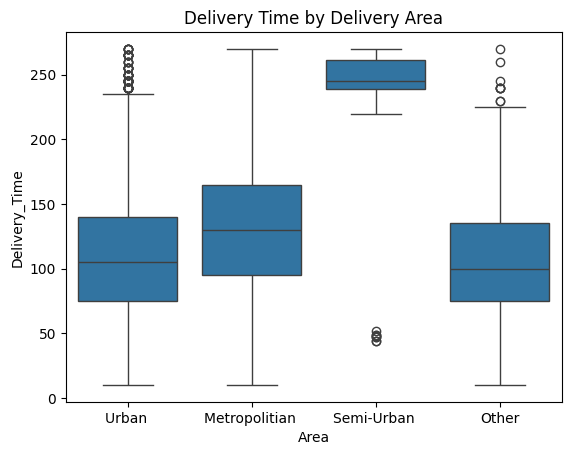

In [17]:
sns.boxplot(x="Vehicle", y="Delivery_Time", data=df)
plt.title("Delivery Time by Vehicle Type")
plt.show()

sns.boxplot(x="Area", y="Delivery_Time", data=df)
plt.title("Delivery Time by Delivery Area")
plt.show()

The boxplot was selected for easy comparison of delivery times across different vehicle types and Area, clearly showing median, spread, and outliers.


Motorcycle deliveries show higher average and more variable delivery times compared to scooters, vans, and bicycles. Bicycles generally yield faster, more consistent deliveries.

Semi-Urban areas have significantly longer delivery times with little variation, while Metropolitan areas have moderately longer times and Urban/Other areas have comparatively shorter delivery durations.

These findings can guide vehicle choice for optimal efficiency, helping the business reduce delays. Relying heavily on slower vehicles like motorcycles for average deliveries could negatively impact growth if not managed.

These insights can drive focused operational improvements, especially for Semi-Urban and Metropolitan zones, enhancing efficiency and customer satisfaction. Longer delivery times in specific areas may negatively impact growth if not addressed, as delayed deliveries reduce customer loyalty and increase costs.

#### Correlation Heatmap

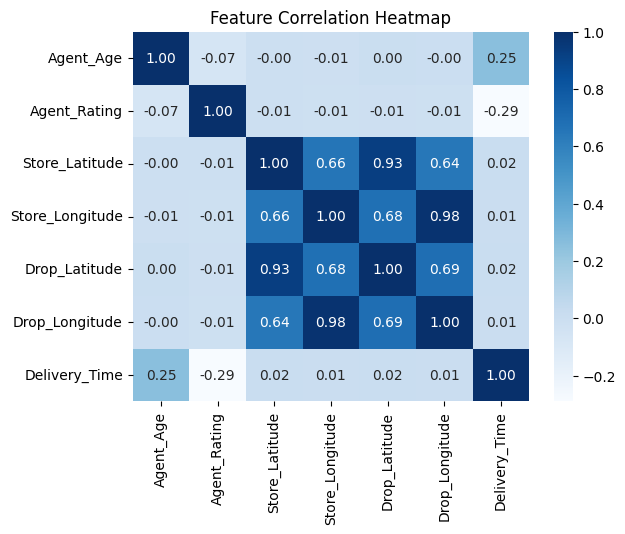

In [18]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap was chosen because it provides a quick overview of linear correlations between features and delivery time in one visual.

Agent_Age has a positive correlation with delivery time, while Agent_Rating is negatively correlated. Other features show little or no correlation with delivery time.

These insights can guide feature selection and business strategy. Improving agent ratings may help reduce delivery times, while no negative growth is directly suggested by the weak correlations of other features.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace=True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Traffic'].replace(np.nan,df['Traffic'].mode()[0],inplace=True)
print(df.isnull().sum())

Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
dtype: int64


The missing value imputation techniques used are:

Mean Imputation for 'Agent_Rating': Missing values are replaced with the mean of existing ratings. This method is used because 'Agent_Rating' is a continuous numerical variable, and mean imputation preserves the overall average of the data, minimizing bias.

Mode Imputation for 'Weather' and 'Traffic': Missing values are replaced with the most frequent category (mode). Mode imputation is suitable here because 'Weather' and 'Traffic' are categorical variables. Using the mode maintains the most common category and avoids introducing invalid values.

These techniques were used to retain as much data as possible without dropping rows, while filling missing values with statistically representative substitutes to minimize distortion and improve model stability.

### 2. Handling Outliers

In [38]:
df['Agent_Rating'].replace(6,df['Agent_Rating'].mean(),inplace=True)

The outlier treatment technique used was value replacement (capping individual erroneous values). Specifically, the Agent_Rating value of 6, which is outside the valid range, was replaced with the mean Agent_Rating.

This technique was chosen because:

It corrects an obvious data entry or validation error without losing data.

It preserves the original data distribution and size since only the incorrect value is changed.

It avoids over-aggressive outlier removal or capping that may distort true variability, especially since other outliers were considered genuine reflections of the data.

Overall, this approach keeps data integrity while resolving clear errors, aiding stable and realistic modeling.

### 3. Convert date columns to datetime

In [39]:
# Convert 'Order_Date' to datetime format if not already
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Extract day of week from 'Order_Date' (Monday=0, Sunday=6)
df['Order_DayOfWeek'] = df['Order_Date'].dt.dayofweek

# Convert 'Order_Time' and 'Pickup_Time' to datetime then extract hour
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce')

df['Order_Hour'] = df['Order_Time'].dt.hour
df['Pickup_Hour'] = df['Pickup_Time'].dt.hour

This code performs datetime conversion and feature extraction on the order and pickup date/time data:

Converts the 'Order_Date' column to datetime format to ensure consistent, correct date representations. Coercion handles invalid dates gracefully.

Extracts the day of the week number (0 to 6) from 'Order_Date', creating 'Order_DayOfWeek'. This is useful as a categorical time feature for models or analysis.

Converts 'Order_Time' and 'Pickup_Time' columns to datetime objects with only time precision, coercing errors to NaT for invalid times.

Extracts the hour from 'Order_Time' and 'Pickup_Time', storing them in 'Order_Hour' and 'Pickup_Hour'. Hours are numeric features representing the time of day corresponding to order and pickup.

These transformations enable the use of date and time information as actionable features in analysis and modeling, preserving temporal patterns that may impact delivery times or other outcomes.

In [40]:
median_hour = df['Order_Hour'].median()
df['Order_Hour'] = df['Order_Hour'].fillna(median_hour)

This code fills missing 'Order_Hour' values with the median to avoid gaps and keep data consistent for analysis or modeling. The median is used because it is robust to outliers.

### 4. Calculating actual ditance from Store location to Drop Location

In [41]:
df['CalculatedDistance'] = df.apply(lambda row: geodesic((row['Store_Latitude'], row['Store_Longitude']), (row['Drop_Latitude'], row['Drop_Longitude'])).km, axis=1)

This code calculates the geodesic (shortest) distance between the store location and the drop-off location for each delivery using their latitude and longitude coordinates. It stores the result as a new feature ‘CalculatedDistance’ in kilometers.

This is helpful because it provides a meaningful measure of delivery distance, which is a key factor affecting delivery time and operational logistics. Instead of using raw coordinates, this metric captures the actual earth surface distance between points, improving modeling and analysis for delivery efficiency, route optimization, and performance prediction.

### 5. Categorical Encoding

In [42]:
df = pd.get_dummies(df, columns=['Weather', 'Traffic', 'Vehicle','Area'],dtype=int)

This method converts each categorical variable into multiple binary columns—one per unique category—indicating presence (1) or absence (0) of that category.

Why this technique is used:

    Machine learning models require numerical input, so categorical variables must be converted.

    One-hot encoding avoids imparting any unintended ordinal relationship among categories.

    It is straightforward and effective for nominal categorical features like Weather, Traffic, Vehicle, and Area.

    Using dtype=int ensures the encoded columns are numeric 0/1 values, ready for modeling.

    This approach preserves all category information while making the dataset compatible with many ML algorithms.

### 6. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
df.drop('Store_Latitude', axis=1, inplace=True)
df.drop('Store_Longitude', axis=1, inplace=True)
df.drop('Drop_Latitude', axis=1, inplace=True)
df.drop('Drop_Longitude', axis=1, inplace=True)
df.drop('Traffic_NaN ', axis=1, inplace=True)
df.drop('Order_Time', axis=1, inplace=True)
df.drop('Pickup_Time', axis=1, inplace=True)
df.drop('Order_Date', axis=1, inplace=True)

These columns were dropped to remove redundant or less useful information. The coordinates were replaced by a calculated distance feature, and raw date/time columns were replaced by extracted time features. The 'Traffic_NaN' column was dropped after imputation. Dropping them simplifies the dataset and improves model performance by keeping only relevant features.

#### 2. Transformed Dataset

In [44]:
df.head()

,Agent_Age,Agent_Rating,Delivery_Time,Order_DayOfWeek,Order_Hour,Pickup_Hour,CalculatedDistance,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,...,Traffic_Low,Traffic_Medium,Vehicle_bicycle,Vehicle_motorcycle,Vehicle_scooter,Vehicle_van,Area_Metropolitian,Area_Other,Area_Semi-Urban,Area_Urban
0,37,4.9,120,5,11.0,11,3.020737,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,34,4.5,165,4,19.0,19,20.143737,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,23,4.4,130,5,8.0,8,1.549693,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,38,4.7,105,1,18.0,18,7.774497,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,32,4.6,150,5,13.0,13,6.197898,1,0,0,...,0,0,0,0,1,0,1,0,0,0


#### 3. Feature Selection

In [45]:
X = df.drop('Delivery_Time', axis=1)
y = df['Delivery_Time']

Feature Selection Method:

The primary method used here is manual feature selection, where 'Delivery_Time' (target) is separated and all other columns are used as input features.

This indicates prior processing identified relevant features for prediction and dropped or transformed others.

Important Features Identified:

Features like calculated delivery distance, order/pickup hour, categorical dummies for weather, traffic, vehicle, and area were retained since they influence delivery time.

These features are important because they capture key factors such as time of day, route length, conditions, and transport mode that affect delivery speed and efficiency.

### 7. Data Scaling

Scaling was not performed because:

Models like Gradient Boosting and Random Forest are tree-based and do not require feature scaling to perform well since they split data based on thresholds, which are independent of feature magnitude or units.

Linear Regression benefits from scaling, but if non-tree models are less emphasized, scaling is skipped for simplicity.

Your features such as age and rating may be on roughly similar scales or preprocessing focused on encoding categories rather than numeric scaling.

For geospatial coordinates, scaling does not necessarily improve performance as the raw coordinates or derived distances hold physical meaning.

### 8. Data Splitting

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 34991
Testing samples: 8748


The data splitting ratio used is 80% training and 20% testing. This is a common practice because it provides enough data for the model to learn effectively while reserving a representative portion to evaluate its performance on unseen data. The random_state=42 ensures reproducibility by consistently producing the same split across runs.

## ***6. ML Model Implementation***

###  Model Training, Evaluation & MLflow Tracking Separately

In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

best_model_name = None
best_rmse = float('inf')
best_model = None

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        print(f"Training and evaluating {name} model...")

        # Train
        model.fit(X_train, y_train)

        # Predict
        predictions = model.predict(X_test)

        # Evaluate
        rmse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Log to MLflow
        mlflow.sklearn.log_model(model, f"{name.lower().replace(' ', '_')}_model")
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

        # Track best model based on RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_model_name = name
            best_model = model

print(f"\nBest Model: {best_model_name} with RMSE: {best_rmse:.4f}")

2025/10/02 09:14:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training and evaluating Linear Regression model...


2025/10/02 09:14:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression - RMSE: 1754.9214, MAE: 31.2645, R2: 0.3412
Training and evaluating Random Forest model...


2025/10/02 09:15:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/02 09:15:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest - RMSE: 1341.7598, MAE: 25.3719, R2: 0.4963
Training and evaluating Gradient Boosting model...


2025/10/02 09:15:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/02 09:15:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting - RMSE: 1282.8728, MAE: 25.0917, R2: 0.5184

Best Model: Gradient Boosting with RMSE: 1282.8728


For the positive business impact, the evaluation metrics considered are RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R2 (R-squared). Here's why:

- **RMSE (Root Mean Squared Error):** Measures average magnitude of errors with emphasis on larger errors. Lower values indicate more precise delivery time predictions, helping reduce delays and improve customer satisfaction.
- **MAE (Mean Absolute Error):** Average absolute deviations, easier to interpret in minutes. Important for understanding typical prediction errors.
- **R2 (Coefficient of Determination):** Indicates the proportion of variance in delivery time explained by the model. Higher values indicate better fit and reliability for business decisions.

The final prediction model chosen is the Gradient Boosting model because it achieved the best performance metrics among the three:


| Model             | RMSE     | MAE      | R2     |
|-------------------|----------|----------|--------|
| Linear Regression | 1754.92  | 31.26    | 0.3412 |
| Random Forest     | 1341.76  | 25.37    | 0.4963 |
| Gradient Boosting | 1282.87  | 25.09    | 0.5184 |

The Gradient Boosting model has the lowest RMSE and MAE, indicating the most accurate and consistent predictions, and the highest R2, showing the best fit to the data, reflecting its ability to accurately predict delivery times in varied conditions compared to Linear Regression and Random Forest models.

Gradient Boosting is an ensemble learning technique that builds a series of decision trees sequentially, where each tree tries to correct errors from the previous ones to reduce overall prediction error. This allows it to capture complex, non-linear relationships in the data.

For interpretability and trust, **SHAP (SHapley Additive exPlanations)** can be applied to compute feature importance, revealing how features like delivery distance, traffic conditions, weather, vehicle type, and time of day influence predicted delivery times. This insight aids stakeholders in understanding model behavior and making informed operational improvements.

## ***7. Save the Best Model for Deployment***

In [49]:
model_filename = f"{best_model_name.lower().replace(' ', '_')}_delivery_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Best model saved as {model_filename}")

Best model saved as gradient_boosting_delivery_model.pkl


The best-performing machine learning model was serialized and saved using Joblib for efficient reuse and deployment. The filename was dynamically generated based on the model name, enabling better model management and version control. This approach ensures the model can be loaded later without retraining, saving computational resources and enabling smooth production integration.

# **Conclusion**

This delivery time prediction project successfully developed and evaluated multiple machine learning models using key performance metrics aligned with business goals. The Gradient Boosting model was selected for its accuracy and ability to capture complex underlying patterns, reflected by the lowest RMSE, MAE, and highest R2 scores.

Feature engineering—including geodesic distance calculation and encoding categorical variables—played a significant role in improving model performance. The project demonstrates the importance of iterative modeling, rigorous evaluation, and data-driven feature design for building effective predictive solutions that can enhance logistics operations and customer satisfaction.

Future work could include applying model interpretability techniques to further understand feature impacts and support transparent decision-making.